<a href="https://colab.research.google.com/github/WhiteDevil12i/Intrusion-Detection-system-Using-CNN/blob/main/NSL_KDD_Final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4

     |████████████████████████████████| 109.3 MB 43 kB/s 
     |████████████████████████████████| 3.1 MB 45.5 MB/s 
     |████████████████████████████████| 488 kB 76.4 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics




In [ ]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D,Flatten
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

1.3.5
1.21.5
3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
1.0.2


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
#Loading training set into dataframe
df = pd.read_csv('/content/drive/My Drive/NSL_KDD/NSL_KDD_dataset/KDDTrain.txt', header=None)
df.head()

0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]

In [ ]:
#Loading testing set into dataframe
qp = pd.read_csv('/content/drive/My Drive/NSL_KDD/NSL_KDD_dataset/KDDTest.txt', header=None)
qp.head()

0     1         2     3      4   5   6   7   8   9   ...    33    34    35  \
0   0   tcp   private   REJ      0   0   0   0   0   0  ...  0.04  0.06  0.00   
1   0   tcp   private   REJ      0   0   0   0   0   0  ...  0.00  0.06  0.00   
2   2   tcp  ftp_data    SF  12983   0   0   0   0   0  ...  0.61  0.04  0.61   
3   0  icmp     eco_i    SF     20   0   0   0   0   0  ...  1.00  0.00  1.00   
4   1   tcp    telnet  RSTO      0  15   0   0   0   0  ...  0.31  0.17  0.03   

     36   37   38    39    40       41  42  
0  0.00  0.0  0.0  1.00  1.00  neptune  21  
1  0.00  0.0  0.0  1.00  1.00  neptune  21  
2  0.02  0.0  0.0  0.00  0.00   normal  21  
3  0.28  0.0  0.0  0.00  0.00    saint  15  
4  0.02  0.0  0.0  0.83  0.71    mscan  11  

[5 rows x 43 columns]

In [ ]:
#Reset column names for training set
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   subclass  difficulty_level  
0    normal                20  
1    normal                15  
2   neptune                19  
3    normal                21  
4    normal                21  

[5 rows x 43 columns]

In [ ]:
#Reset column names for testing set
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   subclass  difficulty_level  
0   neptune                21  
1   neptune                21  
2    normal                21  
3     saint                15  
4     mscan                11  

[5 rows x 43 columns]

In [ ]:
#accessing names of training columns
lst_names = df.columns # returns a list of column names
lst_names


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
#accessing names of testing columns
testlst_names = qp.columns
testlst_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
#Dropping the last columns of training set
df = df.drop('difficulty_level', 1)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(125973, 42)

In [ ]:
#Dropping the last columns of testing set
qp = qp.drop('difficulty_level', 1)
qp.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(22544, 42)

In [ ]:
df.isnull().values.any()

False

In [ ]:
qp.isnull().values.any()

False

In [ ]:
#defining col list
cols = ['protocol_type','service','flag']
cols

['protocol_type', 'service', 'flag']

In [ ]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df


In [ ]:
#Merging train and test data
combined_data = pd.concat([df,qp])

In [ ]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
#Dropping subclass column for training set
tmp = combined_data.pop('subclass')

In [ ]:
#Normalizing training set
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  \
0           0.0  3.558064e-07  0.000000e+00   0.0             0.0     0.0   
1           0.0  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2           0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3           0.0  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4           0.0  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
...         ...           ...           ...   ...             ...     ...   
22539       0.0  5.753774e-07  2.542106e-07   0.0             0.0     0.0   
22540       0.0  2.297162e-07  7.160648e-07   0.0             0.0     0.0   
22541       0.0  3.952277e-05  6.346868e-06   0.0             0.0     0.0   
22542       0.0  3.043558e-08  3.206260e-08   0.0             0.0     0.0   
22543       0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0      0.000000                0.0        0.0         0.000000  ...       0.0   
1      0.000000                0.0        0.0         0.000000  ...       0.0   
2      0.000000                0.0        0.0         0.000000  ...       0.0   
3      0.000000                0.0        1.0         0.000000  ...       0.0   
4      0.000000                0.0        1.0         0.000000  ...       0.0   
...         ...                ...        ...              ...  ...       ...   
22539  0.000000                0.0        1.0         0.000000  ...       0.0   
22540  0.000000                0.0        1.0         0.000000  ...       0.0   
22541  0.019802                0.0        1.0         0.000134  ...       0.0   
22542  0.000000                0.0        0.0         0.000000  ...       0.0   
22543  0.000000                0.0        0.0         0.000000  ...       1.0   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
1            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
2            0.0          0.0        0.0      1.0      0.0      0.0      0.0   
3            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
4            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
...          ...          ...        ...      ...      ...      ...      ...   
22539        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22540        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22541        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22542        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22543        0.0          0.0        0.0      0.0      0.0      0.0      0.0   

       flag_SF  flag_SH  
0          1.0      0.0  
1          1.0      0.0  
2          0.0      0.0  
3          1.0      0.0  
4          1.0      0.0  
...        ...      ...  
22539      1.0      0.0  
22540      1.0      0.0  
22541      1.0      0.0  
22542      1.0      0.0  
22543      0.0      0.0  

[148517 rows x 122 columns]

In [ ]:
#Fixing labels for training set
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in tmp:
    if item in check1:
        classlist.append("DoS")
        DoSCount=DoSCount+1
    elif item in check2:
        classlist.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in check3:
        classlist.append("U2R")
        U2RCount=U2RCount+1
    elif item in check4:
        classlist.append("R2L")
        R2LCount=R2LCount+1
    else:
        classlist.append("Normal")
        NormalCount=NormalCount+1

In [ ]:
DoSCount

53387

In [ ]:
#Appending class column to training set
new_train_df["Class"] = classlist
new_train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  \
0           0.0  3.558064e-07  0.000000e+00   0.0             0.0     0.0   
1           0.0  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2           0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3           0.0  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4           0.0  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
...         ...           ...           ...   ...             ...     ...   
22539       0.0  5.753774e-07  2.542106e-07   0.0             0.0     0.0   
22540       0.0  2.297162e-07  7.160648e-07   0.0             0.0     0.0   
22541       0.0  3.952277e-05  6.346868e-06   0.0             0.0     0.0   
22542       0.0  3.043558e-08  3.206260e-08   0.0             0.0     0.0   
22543       0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   

            hot  num_failed_logins  logged_in  num_compromised  ...  \
0      0.000000                0.0        0.0         0.000000  ...   
1      0.000000                0.0        0.0         0.000000  ...   
2      0.000000                0.0        0.0         0.000000  ...   
3      0.000000                0.0        1.0         0.000000  ...   
4      0.000000                0.0        1.0         0.000000  ...   
...         ...                ...        ...              ...  ...   
22539  0.000000                0.0        1.0         0.000000  ...   
22540  0.000000                0.0        1.0         0.000000  ...   
22541  0.019802                0.0        1.0         0.000134  ...   
22542  0.000000                0.0        0.0         0.000000  ...   
22543  0.000000                0.0        0.0         0.000000  ...   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
1            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
2            0.0          0.0        0.0      1.0      0.0      0.0      0.0   
3            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
4            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
...          ...          ...        ...      ...      ...      ...      ...   
22539        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22540        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22541        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22542        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22543        0.0          0.0        0.0      0.0      0.0      0.0      0.0   

       flag_SF  flag_SH   Class  
0          1.0      0.0  Normal  
1          1.0      0.0  Normal  
2          0.0      0.0     DoS  
3          1.0      0.0  Normal  
4          1.0      0.0  Normal  
...        ...      ...     ...  
22539      1.0      0.0  Normal  
22540      1.0      0.0  Normal  
22541      1.0      0.0     DoS  
22542      1.0      0.0  Normal  
22543      0.0      0.0   Probe  

[148517 rows x 123 columns]

In [ ]:
new_train_df["Class"].value_counts()

Normal    77232
DoS       53387
Probe     14077
R2L        3702
U2R         119
Name: Class, dtype: int64

In [ ]:
new_train_df.isnull().values.any()

False

In [ ]:
y_train=new_train_df["Class"]
y_train

0        Normal
1        Normal
2           DoS
3        Normal
4        Normal
          ...  
22539    Normal
22540    Normal
22541       DoS
22542    Normal
22543     Probe
Name: Class, Length: 148517, dtype: object

In [ ]:
y_train.isnull().values.any()

False

In [ ]:
combined_data_X = new_train_df.drop('Class', 1)
combined_data_X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  \
0           0.0  3.558064e-07  0.000000e+00   0.0             0.0     0.0   
1           0.0  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2           0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3           0.0  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4           0.0  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
...         ...           ...           ...   ...             ...     ...   
22539       0.0  5.753774e-07  2.542106e-07   0.0             0.0     0.0   
22540       0.0  2.297162e-07  7.160648e-07   0.0             0.0     0.0   
22541       0.0  3.952277e-05  6.346868e-06   0.0             0.0     0.0   
22542       0.0  3.043558e-08  3.206260e-08   0.0             0.0     0.0   
22543       0.0  0.000000e+00  0.000000e+00   0.0             0.0     0.0   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0      0.000000                0.0        0.0         0.000000  ...       0.0   
1      0.000000                0.0        0.0         0.000000  ...       0.0   
2      0.000000                0.0        0.0         0.000000  ...       0.0   
3      0.000000                0.0        1.0         0.000000  ...       0.0   
4      0.000000                0.0        1.0         0.000000  ...       0.0   
...         ...                ...        ...              ...  ...       ...   
22539  0.000000                0.0        1.0         0.000000  ...       0.0   
22540  0.000000                0.0        1.0         0.000000  ...       0.0   
22541  0.019802                0.0        1.0         0.000134  ...       0.0   
22542  0.000000                0.0        0.0         0.000000  ...       0.0   
22543  0.000000                0.0        0.0         0.000000  ...       1.0   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
1            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
2            0.0          0.0        0.0      1.0      0.0      0.0      0.0   
3            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
4            0.0          0.0        0.0      0.0      0.0      0.0      0.0   
...          ...          ...        ...      ...      ...      ...      ...   
22539        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22540        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22541        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22542        0.0          0.0        0.0      0.0      0.0      0.0      0.0   
22543        0.0          0.0        0.0      0.0      0.0      0.0      0.0   

       flag_SF  flag_SH  
0          1.0      0.0  
1          1.0      0.0  
2          0.0      0.0  
3          1.0      0.0  
4          1.0      0.0  
...        ...      ...  
22539      1.0      0.0  
22540      1.0      0.0  
22541      1.0      0.0  
22542      1.0      0.0  
22543      0.0      0.0  

[148517 rows x 122 columns]

In [ ]:
oos_pred = []

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)
kfold.get_n_splits(combined_data_X,y_train)

2

In [ ]:
#CNN
batch_size = 128
model = Sequential()
model.add(Convolution1D(64, kernel_size=122, border_mode="same",activation="relu",input_shape=(122, 1)))
model.add(MaxPooling1D(pool_length=(5)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=122, activation="relu", input_shape=(122, 1), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=5)`
  """


In [ ]:
for layer in model.layers:
    print(layer.output_shape)

(None, 122, 64)
(None, 24, 64)
(None, 1536)
(None, 128)
(None, 128)
(None, 5)


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 122, 64)           7872      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               196736    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 645       
Total params: 205,253
Trainable params: 205,253
Non-trainable params: 0
_________________________________________________________________


train index: [     0      2      3 ... 148512 148514 148516]
test index: [     1      7     10 ... 148511 148513 148515]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 74258 samples, validate on 74259 samples
Epoch 1/2
74258/74258 [==============================] - 63s 852us/step - loss: 0.1331 - acc: 0.9580 - val_loss: 0.0686 - val_acc: 0.9759
Epoch 2/2
74258/74258 [==============================] - 61s 815us/step - loss: 0.0755 - acc: 0.9748 - val_loss: 0.0571 - val_acc: 0.9801
Validation score: 0.9801101549980473
CNN:Specificity:0.9882370570165581
CNN:Sensitivity:0.9956690844108063


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DoS       0.99      0.99      0.99     26694
      Normal       0.98      0.99      0.98     38616
       Probe       0.96      0.99      0.97      7038
         R2L       0.92      0.75      0.83      1851
         U2R       0.00      0.00      0.00        60

    accuracy                           0.98     74259
   macro avg       0.77      0.74      0.75     74259
weighted avg       0.98      0.98      0.98     74259



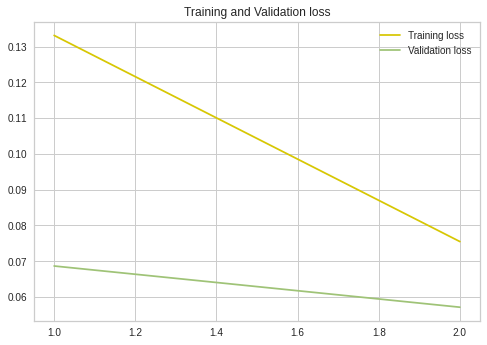

train index: [     1      7     10 ... 148511 148513 148515]
test index: [     0      2      3 ... 148512 148514 148516]
Train on 74259 samples, validate on 74258 samples
Epoch 1/2
74259/74259 [==============================] - 61s 827us/step - loss: 0.0611 - acc: 0.9793 - val_loss: 0.0473 - val_acc: 0.9827
Epoch 2/2
74259/74259 [==============================] - 65s 871us/step - loss: 0.0514 - acc: 0.9818 - val_loss: 0.0420 - val_acc: 0.9849
Validation score: 0.9849174499717203
CNN:Specificity:0.9964784775034653
CNN:Sensitivity:0.996741301377063


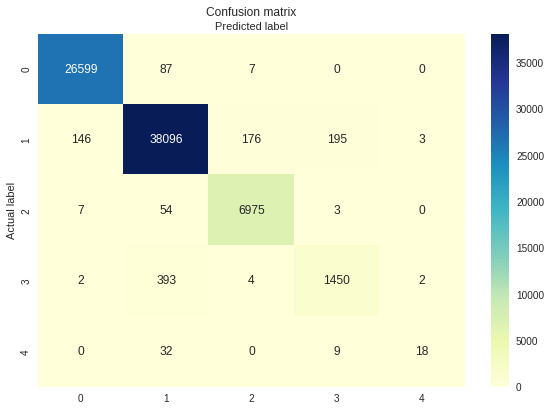

              precision    recall  f1-score   support

         DoS       0.99      1.00      1.00     26693
      Normal       0.99      0.99      0.99     38616
       Probe       0.97      0.99      0.98      7039
         R2L       0.88      0.78      0.83      1851
         U2R       0.78      0.31      0.44        59

    accuracy                           0.98     74258
   macro avg       0.92      0.81      0.85     74258
weighted avg       0.98      0.98      0.98     74258



In [ ]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    print("train index:",train_index)
    print("test index:",test_index)

    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))

    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values


    history = model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=2)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))


    cnf_matrix =confusion_matrix(y_eval, pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    specificity = TP/(TP+FN)
    sensitive = TN/(TN+FP)
    print("CNN:Specificity:" + str(specificity[0]))
    print("CNN:Sensitivity:" + str(sensitive[0]))


    #confusion Matrix
    matrix =confusion_matrix(y_eval, pred)
    class_names=['DoS','Normal','Probe','R2L','U2R']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    target_names = ['DoS','Normal','Probe','R2L','U2R']
    print(classification_report(y_eval, pred, target_names=target_names))

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'y', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'g', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()


In [ ]:
#CNN+LSTM
batch_size = 128
model = Sequential()
model.add(Convolution1D(64, kernel_size=122, border_mode="same",activation="relu",input_shape=(122, 1)))
model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Reshape((128, 1), input_shape = (128, )))

model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=122, activation="relu", input_shape=(122, 1), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=5)`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=5)`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
for layer in model.layers:
    print(layer.output_shape)

(None, 122, 64)
(None, 24, 64)
(None, 24, 64)
(None, 128)
(None, 128, 1)
(None, 25, 1)
(None, 25, 1)
(None, 256)
(None, 256)
(None, 5)
(None, 5)


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 122, 64)           7872      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 64)            256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
reshape_1 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 25, 1)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 1)             4         
__________

train index: [     0      2      3 ... 148512 148514 148516]
test index: [     1      7     10 ... 148511 148513 148515]
Train on 74258 samples, validate on 74259 samples
Epoch 1/2
74258/74258 [==============================] - 320s 4ms/step - loss: 0.1305 - acc: 0.9582 - val_loss: 0.2237 - val_acc: 0.9225
Epoch 2/2
74258/74258 [==============================] - 318s 4ms/step - loss: 0.0844 - acc: 0.9721 - val_loss: 0.0654 - val_acc: 0.9773
Validation score: 0.9772956813315558
CNN+LSTM:Specificity:0.9812317374690942
CNN+LSTM:Sensitivity:0.9977924944812362


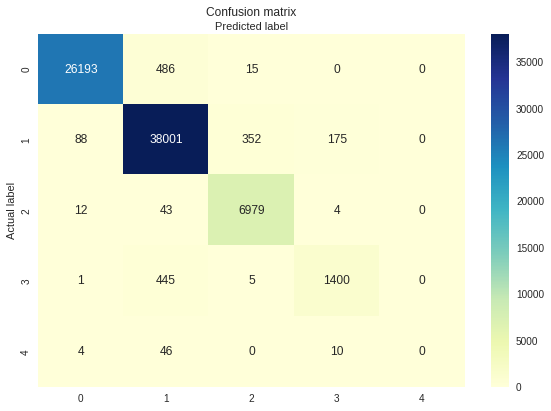

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DoS       1.00      0.98      0.99     26694
      Normal       0.97      0.98      0.98     38616
       Probe       0.95      0.99      0.97      7038
         R2L       0.88      0.76      0.81      1851
         U2R       0.00      0.00      0.00        60

    accuracy                           0.98     74259
   macro avg       0.76      0.74      0.75     74259
weighted avg       0.98      0.98      0.98     74259



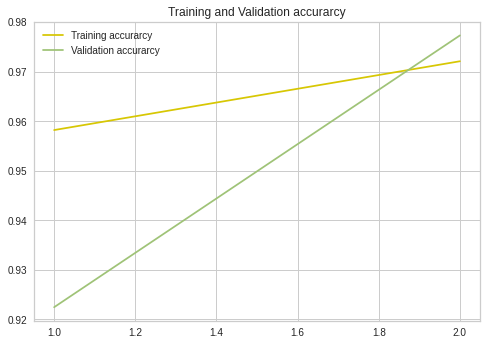

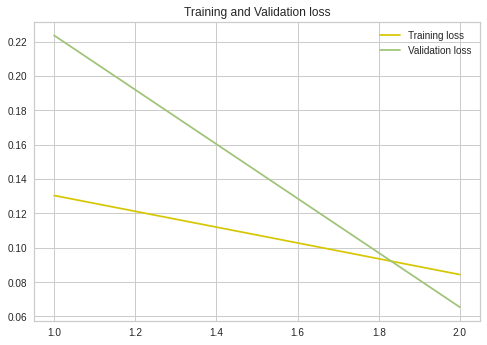

train index: [     1      7     10 ... 148511 148513 148515]
test index: [     0      2      3 ... 148512 148514 148516]
Train on 74259 samples, validate on 74258 samples
Epoch 1/2
74259/74259 [==============================] - 314s 4ms/step - loss: 0.0666 - acc: 0.9776 - val_loss: 0.0652 - val_acc: 0.9780
Epoch 2/2
74259/74259 [==============================] - 318s 4ms/step - loss: 0.0569 - acc: 0.9805 - val_loss: 0.0462 - val_acc: 0.9838
Validation score: 0.9838401249697002
CNN+LSTM:Specificity:0.9965159405087476
CNN+LSTM:Sensitivity:0.9945968674445496


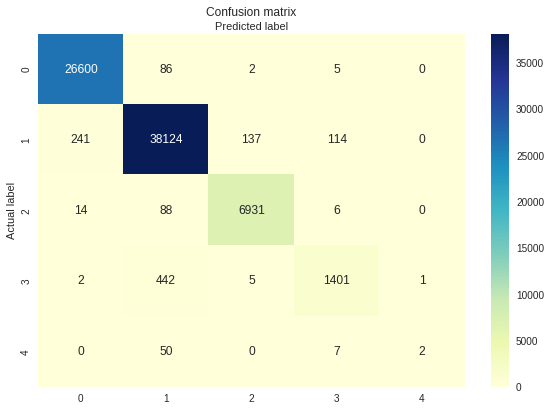

              precision    recall  f1-score   support

         DoS       0.99      1.00      0.99     26693
      Normal       0.98      0.99      0.99     38616
       Probe       0.98      0.98      0.98      7039
         R2L       0.91      0.76      0.83      1851
         U2R       0.67      0.03      0.06        59

    accuracy                           0.98     74258
   macro avg       0.91      0.75      0.77     74258
weighted avg       0.98      0.98      0.98     74258



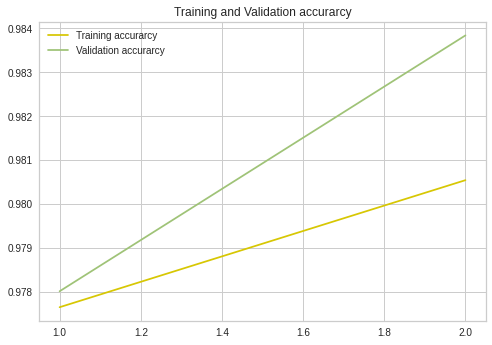

In [ ]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    print("train index:",train_index)
    print("test index:",test_index)

    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))

    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values


    history = model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=2)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))


    cnf_matrix =confusion_matrix(y_eval, pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    specificity = TP/(TP+FN)
    sensitive = TN/(TN+FP)
    print("CNN+LSTM:Specificity:" + str(specificity[0]))
    print("CNN+LSTM:Sensitivity:" + str(sensitive[0]))


    #confusion Matrix
    matrix =confusion_matrix(y_eval, pred)
    class_names=['DoS','Normal','Probe','R2L','U2R']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    target_names = ['DoS','Normal','Probe','R2L','U2R']
    print(classification_report(y_eval, pred, target_names=target_names))

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'y', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'g', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()


In [ ]:
#RNN-LSTM
batch_size = 128
model = Sequential()
model.add(keras.layers.LSTM(64,input_shape=(122, 1),activation='tanh',recurrent_activation='hard_sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
for layer in model.layers:
    print(layer.output_shape)

(None, 64)
(None, 5)
(None, 5)


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________


train index: [     0      2      3 ... 148512 148514 148516]
test index: [     1      7     10 ... 148511 148513 148515]
Train on 74258 samples, validate on 74259 samples
Epoch 1/2
74258/74258 [==============================] - 238s 3ms/step - loss: 0.5331 - acc: 0.8282 - val_loss: 0.4538 - val_acc: 0.8264
Epoch 2/2
74258/74258 [==============================] - 248s 3ms/step - loss: 0.3954 - acc: 0.8826 - val_loss: 0.5197 - val_acc: 0.8362
Validation score: 0.8361680065715941
RNN:Specificity:0.9079943058365175
RNN:Sensitivity:0.9324082834016609


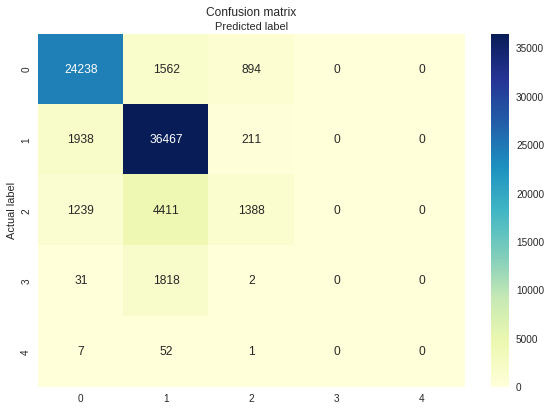

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DoS       0.88      0.91      0.90     26694
      Normal       0.82      0.94      0.88     38616
       Probe       0.56      0.20      0.29      7038
         R2L       0.00      0.00      0.00      1851
         U2R       0.00      0.00      0.00        60

    accuracy                           0.84     74259
   macro avg       0.45      0.41      0.41     74259
weighted avg       0.80      0.84      0.81     74259



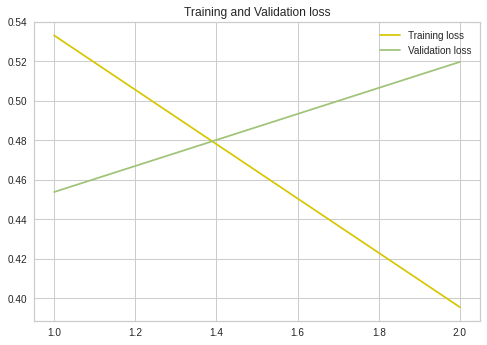

train index: [     1      7     10 ... 148511 148513 148515]
test index: [     0      2      3 ... 148512 148514 148516]
Train on 74259 samples, validate on 74258 samples
Epoch 1/2
74259/74259 [==============================] - 246s 3ms/step - loss: 0.3288 - acc: 0.8970 - val_loss: 0.3565 - val_acc: 0.8940
Epoch 2/2
74259/74259 [==============================] - 246s 3ms/step - loss: 0.2706 - acc: 0.9150 - val_loss: 0.3431 - val_acc: 0.8973
Validation score: 0.8972635944948693
RNN:Specificity:0.9127861237028434
RNN:Sensitivity:0.9610217596972563


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DoS       0.93      0.91      0.92     26693
      Normal       0.91      0.97      0.94     38616
       Probe       0.74      0.67      0.71      7039
         R2L       0.26      0.05      0.08      1851
         U2R       0.00      0.00      0.00        59

    accuracy                           0.90     74258
   macro avg       0.57      0.52      0.53     74258
weighted avg       0.88      0.90      0.89     74258



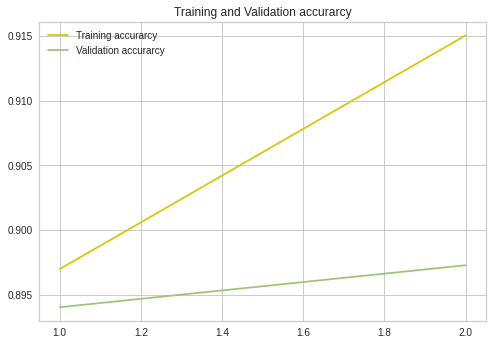

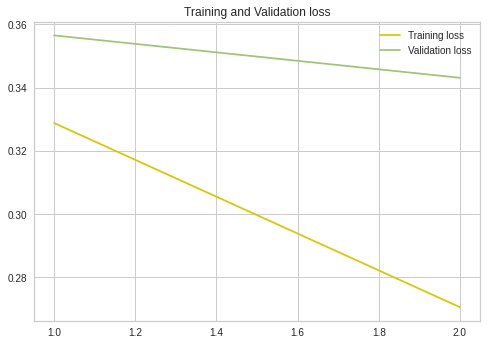

In [ ]:
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    print("train index:",train_index)
    print("test index:",test_index)

    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))

    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values


    history = model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=2)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))


    cnf_matrix =confusion_matrix(y_eval, pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    specificity = TP/(TP+FN)
    sensitive = TN/(TN+FP)
    print("RNN:Specificity:" + str(specificity[0]))
    print("RNN:Sensitivity:" + str(sensitive[0]))


    #confusion Matrix
    matrix =confusion_matrix(y_eval, pred)
    class_names=['DoS','Normal','Probe','R2L','U2R']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    target_names = ['DoS','Normal','Probe','R2L','U2R']
    print(classification_report(y_eval, pred, target_names=target_names))

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'y', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'g', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
